In [47]:
library(readxl)
library(mgcv)
library(ggplot2)
library(GGally)
library(gratia)
library(Metrics)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



## Code for Prediction [remove # and run this code]

In [185]:
data = read_excel("Real estate valuation data set.xlsx")
data = subset(data, select = -c(1) )
colnames(data) = c("TransactionDate", 
                   "HouseAge_Years",
                   "DistanceToMRTStation_Metres",
                   "NumberOfConvenienceStores", 
                   "Latitude", 
                   "Longitude", 
                   "Price")
gam_mod_final <- gam(Price ~ s(TransactionDate, bs="cr") + 
                s(HouseAge_Years, bs="cr") + 
                s(DistanceToMRTStation_Metres, bs="cr") + 
                s(NumberOfConvenienceStores, bs="cr") + 
                ti(Latitude, Longitude, bs="cr"), data=data)

In [ ]:
# test = read_excel("<Enter your file name here>.xlsx")
# unit_house_price = predict(gam_mod_final, data=test)
# data.frame(unit_house_price)

### Read in data

In [52]:
data = read_excel("Real estate valuation data set.xlsx")
data = subset(data, select = -c(1) )

In [135]:
dim(data)

[1] 414   7

In [55]:
colnames(data) = c("transaction_date", "age", "dist_to_mrt", "num_conv_stores", "lat", "long", "price")

In [56]:
head(data)

transaction_date,age,dist_to_mrt,num_conv_stores,lat,long,price
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


### Exploratory Data Analysis

In [156]:
dim(train)

[1] 342   7

In [153]:
sum(train$transaction_date < 2013)

[1] 108

In [163]:
quantile(train$lat)

0%      25%      50%      75%     100% 
24.93293 24.96305 24.97110 24.97744 25.00115

In [136]:
summary(train)

 transaction_date      age         dist_to_mrt      num_conv_stores 
 Min.   :2013     Min.   : 0.00   Min.   :  23.38   Min.   : 0.000  
 1st Qu.:2013     1st Qu.: 9.75   1st Qu.: 288.03   1st Qu.: 1.000  
 Median :2013     Median :16.10   Median : 492.23   Median : 4.000  
 Mean   :2013     Mean   :17.79   Mean   :1029.68   Mean   : 4.146  
 3rd Qu.:2013     3rd Qu.:28.15   3rd Qu.:1449.11   3rd Qu.: 6.000  
 Max.   :2014     Max.   :43.80   Max.   :6306.15   Max.   :10.000  
      lat             long           price       
 Min.   :24.93   Min.   :121.5   Min.   :  7.60  
 1st Qu.:24.96   1st Qu.:121.5   1st Qu.: 28.50  
 Median :24.97   Median :121.5   Median : 38.40  
 Mean   :24.97   Mean   :121.5   Mean   : 38.00  
 3rd Qu.:24.98   3rd Qu.:121.5   3rd Qu.: 46.35  
 Max.   :25.00   Max.   :121.6   Max.   :117.50  

In [59]:
options(repr.plot.width=15, repr.plot.height=8)

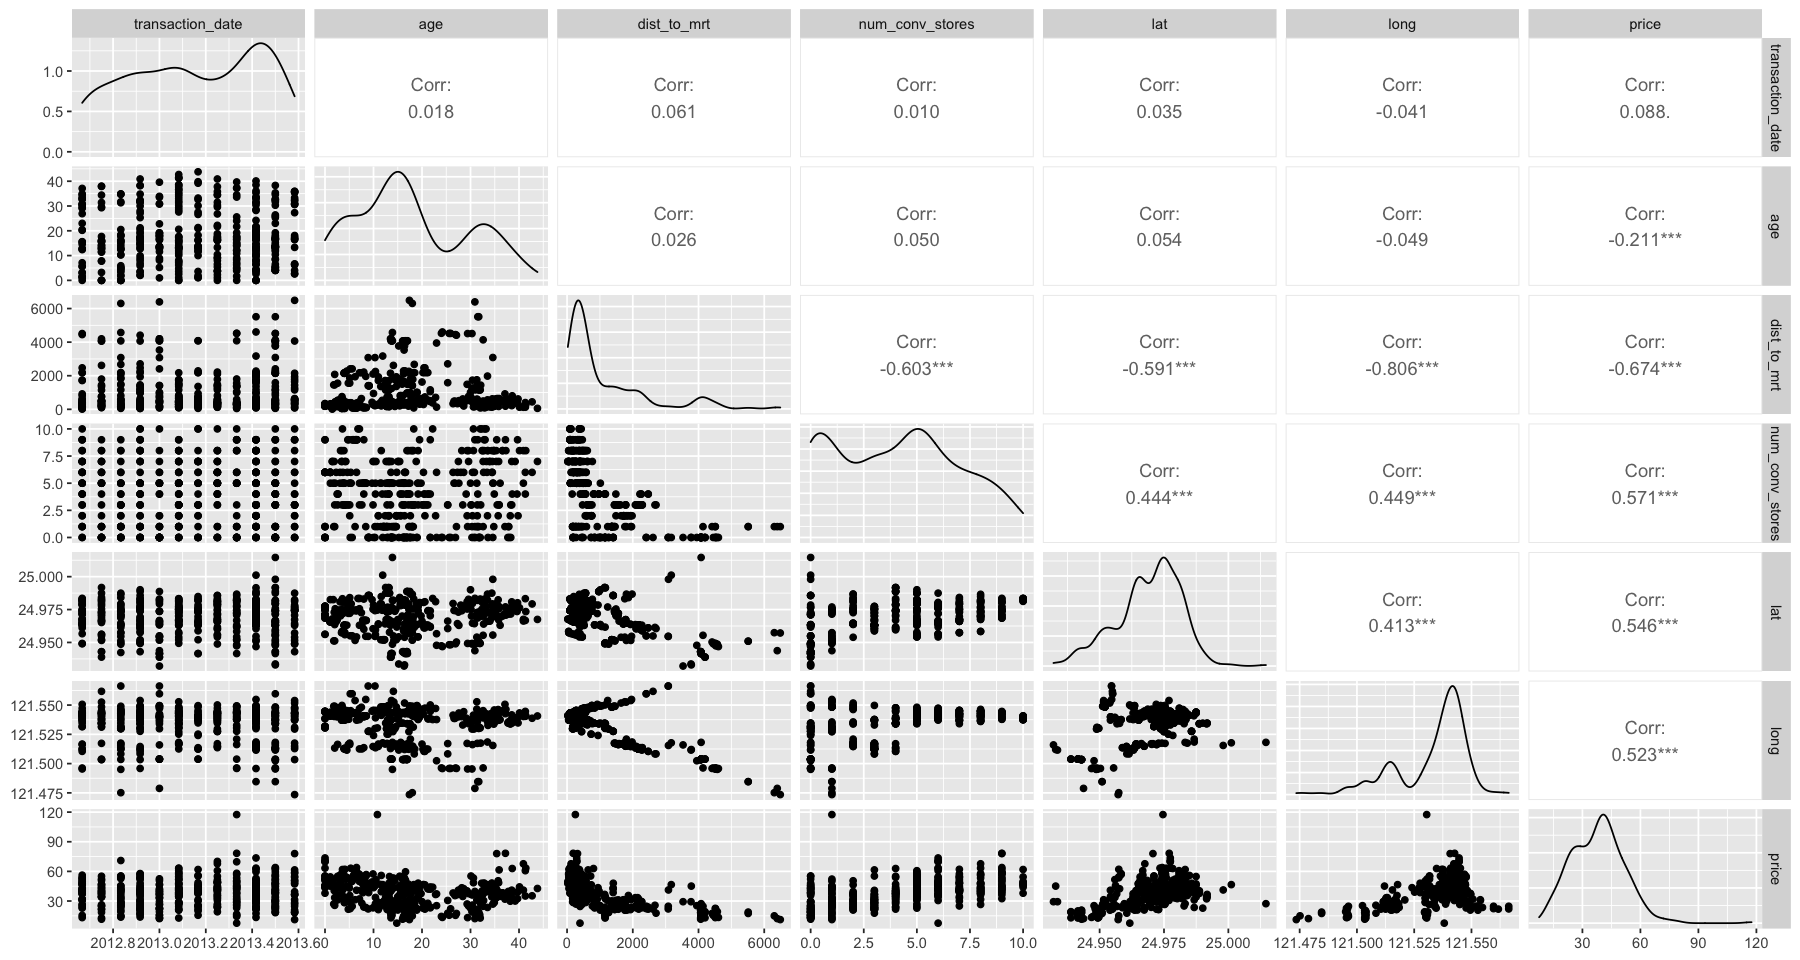

In [60]:
ggpairs(data)

### Simple Linear Model

In [130]:
summary(lm(price ~ ., data=data))


Call:
lm(formula = price ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.667  -5.412  -0.967   4.217  75.190 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.444e+04  6.775e+03  -2.132  0.03364 *  
transaction_date  5.149e+00  1.557e+00   3.307  0.00103 ** 
age              -2.697e-01  3.853e-02  -7.000 1.06e-11 ***
dist_to_mrt      -4.488e-03  7.180e-04  -6.250 1.04e-09 ***
num_conv_stores   1.133e+00  1.882e-01   6.023 3.83e-09 ***
lat               2.255e+02  4.457e+01   5.059 6.38e-07 ***
long             -1.243e+01  4.858e+01  -0.256  0.79820    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.858 on 407 degrees of freedom
Multiple R-squared:  0.5824,	Adjusted R-squared:  0.5762 
F-statistic:  94.6 on 6 and 407 DF,  p-value: < 2.2e-16


### Train Test Split

In [94]:
set.seed(1029)
sample <- sample(c(TRUE, FALSE), nrow(data), replace=TRUE, prob=c(0.8,0.2))
train  <- data[sample, ]
test   <- data[!sample, ]

### Various Generalized Additive Models (Comparison based on AIC and RMSE)

In [96]:
gam_mod1 <- gam(price ~ s(transaction_date) + 
                s(age) +
                s(dist_to_mrt) + 
                s(num_conv_stores) + 
                ti(lat, long), data=train)

In [97]:
gam_mod2 <- gam(price ~ s(transaction_date, bs="cr") + 
                s(age, bs="cr") + 
                s(dist_to_mrt, bs="cr") + 
                s(num_conv_stores, bs="cr") + 
                ti(lat, long, bs="cr"), data=train)

In [98]:
gam_mod3 <- gam(price ~ s(transaction_date, bs="cr") + 
                s(dist_to_mrt, bs="cr") +
                s(num_conv_stores, bs="cr") +
                ti(lat, long, bs="cr"), data=train)

In [99]:
gam_mod4 <- gam(price ~ s(transaction_date, bs="bs") +
                s(dist_to_mrt, bs="bs") +
                s(num_conv_stores, bs="bs") +
                ti(lat, long, bs="bs"), data=train)

In [108]:
gam_mod5 <- gam(price ~ transaction_date + 
                s(age, bs="cr") +
                s(dist_to_mrt, bs="cr") +
                s(num_conv_stores, bs="cr") +
                ti(lat, long, bs="cr"), data=train)

In [109]:
gam_mod6 <- gam(price ~ transaction_date +
                s(age, bs="bs") + 
                s(dist_to_mrt, bs="bs") + 
                s(num_conv_stores, bs="bs") + 
                ti(lat, long, bs="bs"), data=train)

In [100]:
AIC(gam_mod1)

[1] 2396.228

In [101]:
AIC(gam_mod2)

[1] 2383.873

In [102]:
AIC(gam_mod3)

[1] 2431.337

In [103]:
AIC(gam_mod4)

[1] 2448.456

In [110]:
AIC(gam_mod5)

[1] 2383.873

In [111]:
AIC(gam_mod6)

[1] 2395.989

In [104]:
rmse(test$price, predict(gam_mod1, test))

[1] 6.631253

In [105]:
rmse(test$price, predict(gam_mod2, test))

[1] 6.633511

In [106]:
rmse(test$price, predict(gam_mod3, test))

[1] 8.456387

In [107]:
rmse(test$price, predict(gam_mod4, test))

[1] 9.92676

In [112]:
rmse(test$price, predict(gam_mod5, test))

[1] 6.633522

In [113]:
rmse(test$price, predict(gam_mod6, test))

[1] 9.649113

Choose `gam_mod2` as final model based on AIC and RMSE

In [114]:
summary(gam_mod2)


Family: gaussian 
Link function: identity 

Formula:
price ~ s(transaction_date, bs = "cr") + s(age, bs = "cr") + 
    s(dist_to_mrt, bs = "cr") + s(num_conv_stores, bs = "cr") + 
    ti(lat, long, bs = "cr")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   32.534      1.087   29.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                       edf Ref.df      F  p-value    
s(transaction_date)  1.000  1.000 14.335 0.000184 ***
s(age)               2.596  3.228 16.908  < 2e-16 ***
s(dist_to_mrt)       8.756  8.968 20.035  < 2e-16 ***
s(num_conv_stores)   1.000  1.000  7.513 0.006473 ** 
ti(lat,long)        10.221 11.434  6.162  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.692   Deviance explained = 71.3%
GCV = 62.308  Scale est. = 57.831    n = 342

In [179]:
options(repr.plot.width=12, repr.plot.height=15)

### Visualize the GAM

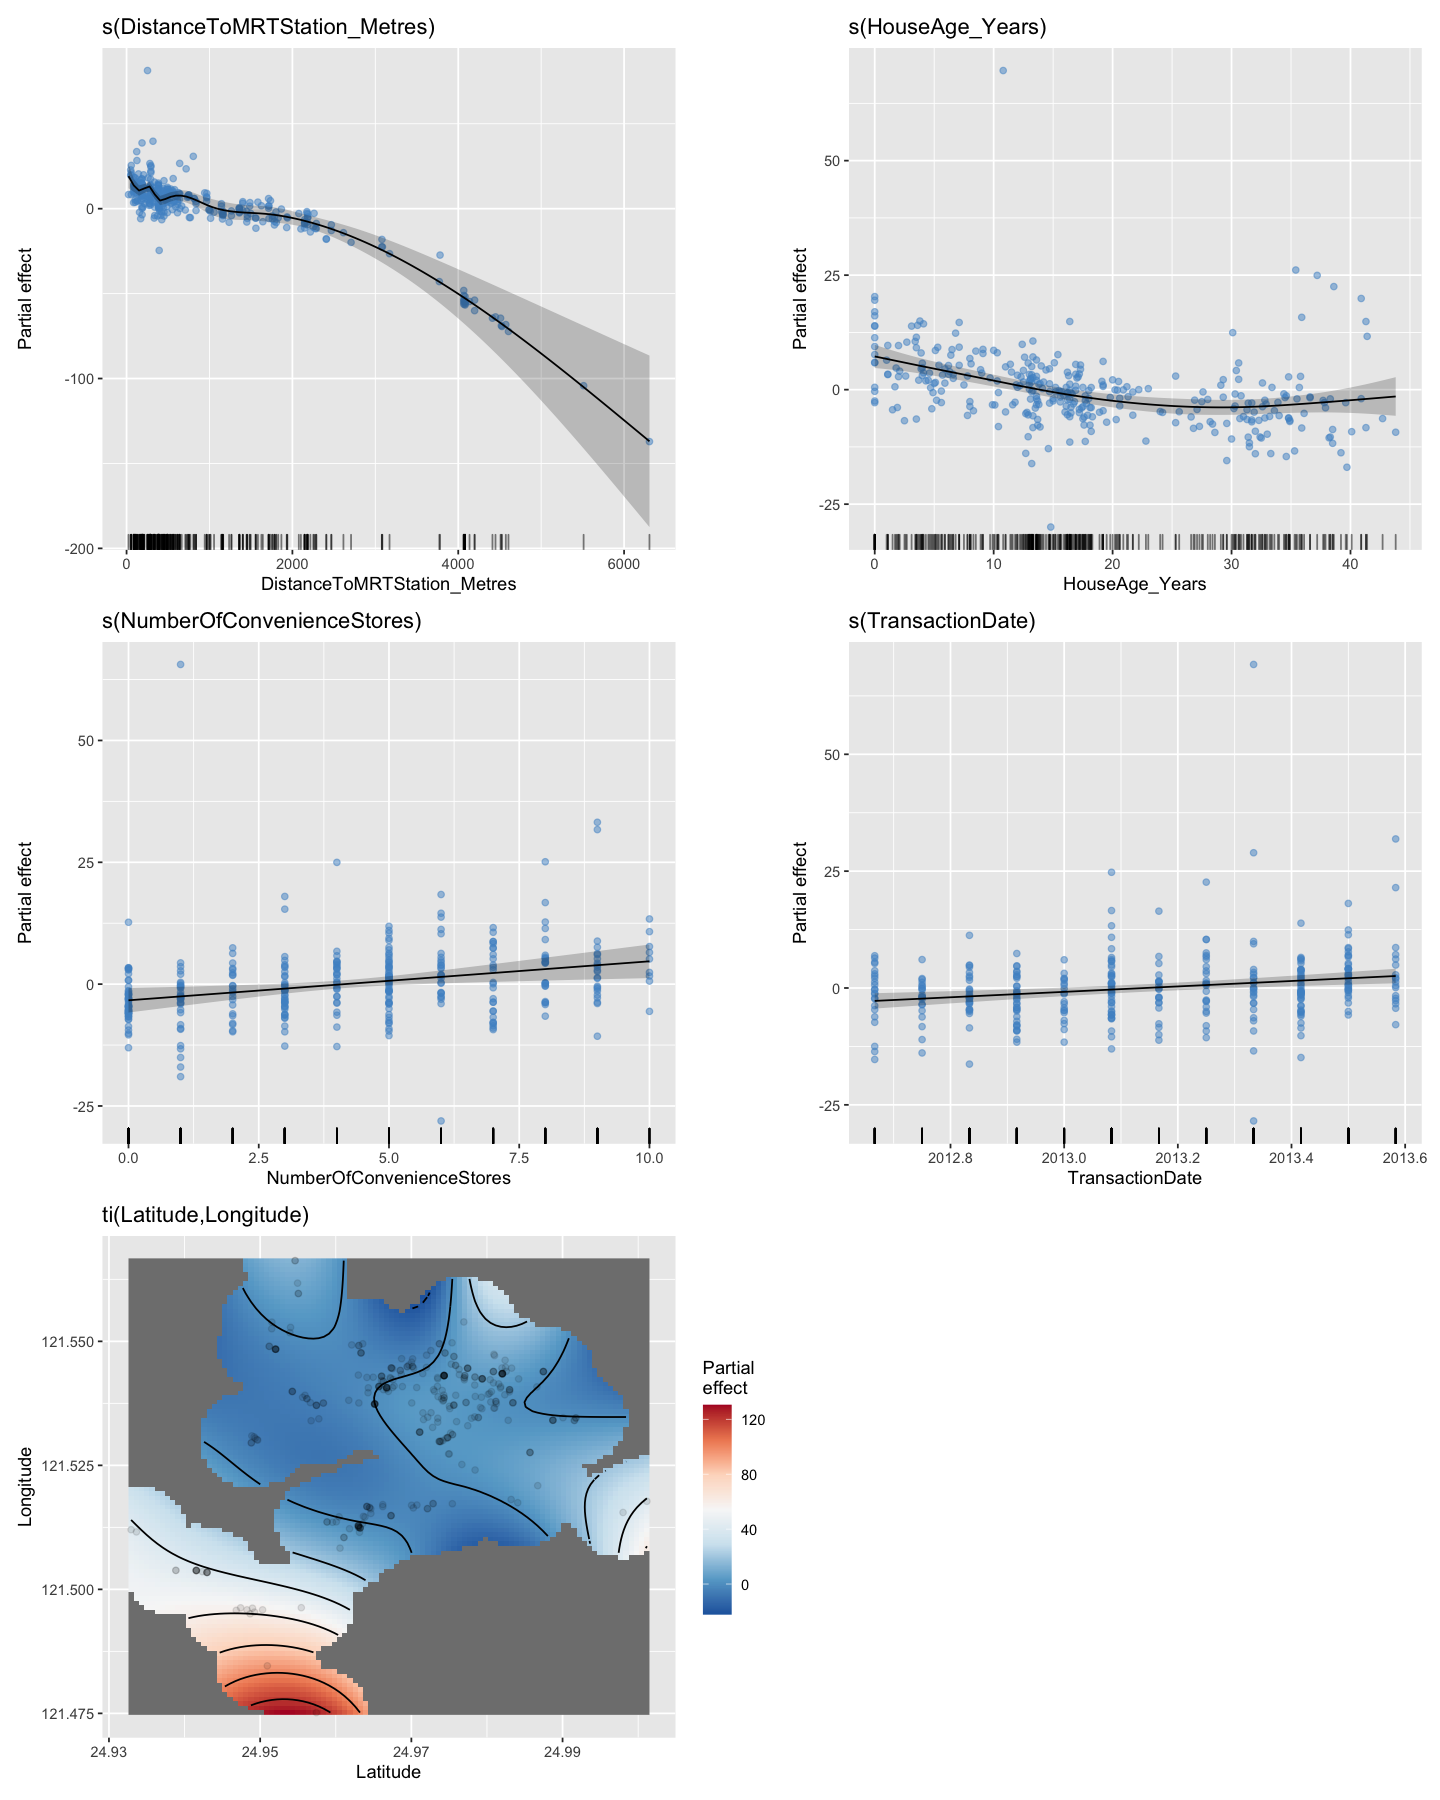

In [180]:
gratia:::draw.gam(gam_mod_final, scales="free", residuals=TRUE, nrow=3)